In [2]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import os

In [3]:
# Retrieve page with the requests module
url = "https://www.finder.com.au/internet-tv/streaming-providers"

html = requests.get(url)

In [4]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html.text, 'html.parser')

In [5]:
soup

<!DOCTYPE html>
<html class="no-js" lang="en-AU"><head><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="width=device-width" id="viewport" name="viewport"/><meta content="finder" name="apple-mobile-web-app-title"/><meta content="finder" name="application-name"/><link href="https://www.finder.com.au/global/images/logos/finder.ico" rel="shortcut icon" type="image/x-icon"/><link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-iphone1.png" rel="apple-touch-icon"/><link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-ipad1.png" rel="apple-touch-icon" sizes="152x152"/><link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-ipad-retina1.png" rel="apple-touch-icon" sizes="167x167"/><link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-iphone-retina1.png" rel="apple-touch-icon" sizes="180x180"/><!-- firebase integrat

In [6]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en-AU">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width" id="viewport" name="viewport"/>
  <meta content="finder" name="apple-mobile-web-app-title"/>
  <meta content="finder" name="application-name"/>
  <link href="https://www.finder.com.au/global/images/logos/finder.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-iphone1.png" rel="apple-touch-icon"/>
  <link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-ipad1.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-ipad-retina1.png" rel="apple-touch-icon" sizes="167x167"/>
  <link href="https://www.finder.com.au/finder-au/wp-uploads/2017/03/touch-icon-iphone-retina1.png" rel="apple-touch-icon" sizes="

In [7]:
#Output is hidden in the class 'js-comparison-table__row'
output = soup.find_all(class_='js-comparison-table__row')

In [8]:
output[0]

<tr class="js-comparison-table__row" data-product-id="1f5102d2-4255-4931-9fbe-84f93da7a743"><td class="comparison-table__name"><div class="comparison-table__cellWrapper comparison-table__cellWrapper--mx"><span>Disney+</span></div></td><td class="comparison-table__product"><div class="comparison-table__cellWrapper"><img alt="Disney+" border="0" class="lazysizes" data-sizes="(max-width: 195px) 100vw, 195px" data-src="https://www.finder.com.au/niche-builder/5d68a0d943351.png" data-srcset="https://www.finder.com.au/niche-builder/5d68a0d943351.png?fit=180 180w, https://www.finder.com.au/niche-builder/5d68a0d943351.png?fit=195 195w" src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSI5IiBoZWlnaHQ9IjUiIHN0eWxlPSJiYWNrZ3JvdW5kLWNvbG9yOiAjRjVGNkY3OyIvPg==" width="65"/></div></td><td class="comparison-table__feature" data-sortvalue="4"><div class="comparison-table__cellWrapper js-calculator-table-value" data-heading="Simultaneous streams">
              

In [9]:
row = output[0].text

In [10]:
row

'Disney+\n              4\n          \n              4K\n          \n              N/A\n          \n              $11.99\n          Sign upView detailsloadingFetching your data...'

In [11]:
#Strip the row and split by \n
[f.strip() for f in row.split("\n")]

['Disney+',
 '4',
 '',
 '4K',
 '',
 'N/A',
 '',
 '$11.99',
 'Sign upView detailsloadingFetching your data...']

In [12]:
#Loop through the output and put the defined item into the list
provider = []
sim_streams = []
monthly_sub_fee = []

for row in output:
    row = row.text
    result = [f.strip() for f in row.split("\n")]
    provider.append(result[0])
    sim_streams.append(int(result[1]))
    monthly_sub_fee.append(float(result[-2].replace('$','')))

In [13]:
provider

['Disney+',
 'Binge Standard',
 'Paramount+',
 'BritBox',
 'Amazon Prime Video',
 'Foxtel Now - Essentials',
 'hayu',
 'Funimation Premium Plus',
 'Apple TV+',
 'Acorn TV',
 '9NOW',
 'Flash',
 'Kayo Sports Basic',
 'CuriosityStream',
 'iwonder',
 'DAZN',
 'beIN Sports Monthly',
 'Binge Basic',
 'Binge Premium',
 'Netflix Basic',
 'SBS On Demand',
 'ABC iview',
 '7PLUS',
 '9NOW',
 'Tenplay',
 'Kayo Sports One',
 'beIN Sports Monthly',
 'Foxtel Now - Sport Pack',
 'Paramount+',
 'DAZN',
 'FITE TV',
 'WWE Network',
 'F1 TV Monthly',
 'NFL Game Pass Pro',
 'Optus Sport Premium',
 'Stan Sport',
 'Kayo Sports Basic',
 'Kayo Sports Premium',
 'Foxtel Sports HD',
 'League Pass Premium',
 'NBA League Pass',
 'UFC Fight Pass',
 'NBL TV',
 'NHL.TV All Access Pass']

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df =pd.DataFrame()
df["Provider"]=provider
df["Monthly_sub_fee"]=monthly_sub_fee
df["Simultaneous_streams"]=sim_streams


In [15]:
df

,Provider,Monthly_sub_fee,Simultaneous_streams
0,Disney+,11.99,4
1,Binge Standard,16.00,2
2,Paramount+,8.99,3
3,BritBox,8.99,4
4,Amazon Prime Video,6.99,3
5,Foxtel Now - Essentials,25.00,2
6,hayu,6.99,1
7,Funimation Premium Plus,7.95,5
8,Apple TV+,7.99,3
9,Acorn TV,6.99,4


In [16]:
#Further dropping the row with Zero in fees
df= df[df['Monthly_sub_fee'] != 0]
df

,Provider,Monthly_sub_fee,Simultaneous_streams
0,Disney+,11.99,4
1,Binge Standard,16.00,2
2,Paramount+,8.99,3
3,BritBox,8.99,4
4,Amazon Prime Video,6.99,3
5,Foxtel Now - Essentials,25.00,2
6,hayu,6.99,1
7,Funimation Premium Plus,7.95,5
8,Apple TV+,7.99,3
9,Acorn TV,6.99,4


In [17]:
#Dropping rows from index 20, as they are not the same category as movie streaming 
df = df.iloc[:19]
df

,Provider,Monthly_sub_fee,Simultaneous_streams
0,Disney+,11.99,4
1,Binge Standard,16.00,2
2,Paramount+,8.99,3
3,BritBox,8.99,4
4,Amazon Prime Video,6.99,3
5,Foxtel Now - Essentials,25.00,2
6,hayu,6.99,1
7,Funimation Premium Plus,7.95,5
8,Apple TV+,7.99,3
9,Acorn TV,6.99,4


Australian Cinema Ticket prices 
https://www.screenaustralia.gov.au/fact-finders/cinema/industry-trends/box-office/ticket-prices


Average cinema ticket price is up from $13.10 in 2012 to $15.24 in 2021

In [18]:
#Look up the average admission price for going cinema
Cinema_admission = float(15.24)

In [19]:
Cinema_admission

15.24

In [20]:
Cinema_sim_stream =int(1)
Cinema_sim_stream

1

In [21]:
#Append the Cinema admission price into the existing datafram to plot the chart
df2 =pd.DataFrame({'Provider':['Cinema'],'Monthly_sub_fee':([Cinema_admission]),'Simultaneous_streams':([Cinema_sim_stream])})
df=pd.concat([df,df2],ignore_index=True,axis=0)
df

,Provider,Monthly_sub_fee,Simultaneous_streams
0,Disney+,11.99,4
1,Binge Standard,16.00,2
2,Paramount+,8.99,3
3,BritBox,8.99,4
4,Amazon Prime Video,6.99,3
5,Foxtel Now - Essentials,25.00,2
6,hayu,6.99,1
7,Funimation Premium Plus,7.95,5
8,Apple TV+,7.99,3
9,Acorn TV,6.99,4


In [22]:
df.to_csv('scrap_streaming_fee.csv')

In [23]:
#sorting value by column "Monthly_sub_fee"
df.sort_values('Monthly_sub_fee',inplace=True, ascending=False)

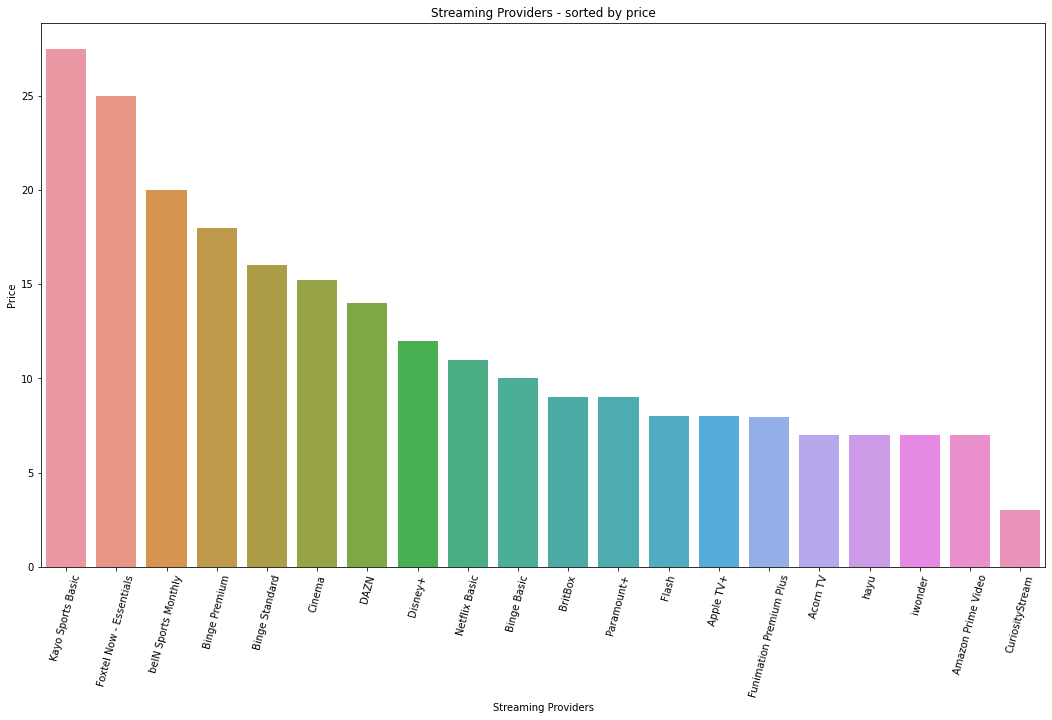

In [24]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.Provider, y=df.Monthly_sub_fee)
plt.xticks(rotation=75)
plt.title('Streaming Providers - sorted by price')
plt.xlabel('Streaming Providers')
plt.ylabel('Price')
plt.show()